In [1]:
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

from datetime import datetime

from utility import *

In [2]:
LOOKBACK = 61
TRAIN_SPLIT_RATIO = 0.9
columns = [CLOSE_INDEX]

In [3]:
todays_date = datetime.now().strftime('%Y-%m-%d')
download_monthly_klines('spot', [BTC], ['15m'], '2019-01-01', todays_date, 'train')

Found 1 symbols
[1/1] - start download monthly BTCUSDT klines 

file already exists! /Users/mahadevmaitri/Downloads/cisc684/Cryptocurrency-Price-Forecasting/train/BTCUSDT/BTCUSDT-15m-2019-01.zip

file already exists! /Users/mahadevmaitri/Downloads/cisc684/Cryptocurrency-Price-Forecasting/train/BTCUSDT/BTCUSDT-15m-2019-02.zip

file already exists! /Users/mahadevmaitri/Downloads/cisc684/Cryptocurrency-Price-Forecasting/train/BTCUSDT/BTCUSDT-15m-2019-03.zip

file already exists! /Users/mahadevmaitri/Downloads/cisc684/Cryptocurrency-Price-Forecasting/train/BTCUSDT/BTCUSDT-15m-2019-04.zip

file already exists! /Users/mahadevmaitri/Downloads/cisc684/Cryptocurrency-Price-Forecasting/train/BTCUSDT/BTCUSDT-15m-2019-05.zip

file already exists! /Users/mahadevmaitri/Downloads/cisc684/Cryptocurrency-Price-Forecasting/train/BTCUSDT/BTCUSDT-15m-2019-06.zip

file already exists! /Users/mahadevmaitri/Downloads/cisc684/Cryptocurrency-Price-Forecasting/train/BTCUSDT/BTCUSDT-15m-2019-07.zip

file already

In [13]:
dataframe = get_data('train', BTC)

train/BTCUSDT/BTCUSDT-15m-2019-01.csv
train/BTCUSDT/BTCUSDT-15m-2019-02.csv
train/BTCUSDT/BTCUSDT-15m-2019-03.csv
train/BTCUSDT/BTCUSDT-15m-2019-04.csv
train/BTCUSDT/BTCUSDT-15m-2019-05.csv
train/BTCUSDT/BTCUSDT-15m-2019-06.csv
train/BTCUSDT/BTCUSDT-15m-2019-07.csv
train/BTCUSDT/BTCUSDT-15m-2019-08.csv
train/BTCUSDT/BTCUSDT-15m-2019-09.csv
train/BTCUSDT/BTCUSDT-15m-2019-10.csv
train/BTCUSDT/BTCUSDT-15m-2019-11.csv
train/BTCUSDT/BTCUSDT-15m-2019-12.csv
train/BTCUSDT/BTCUSDT-15m-2020-01.csv
train/BTCUSDT/BTCUSDT-15m-2020-02.csv
train/BTCUSDT/BTCUSDT-15m-2020-03.csv
train/BTCUSDT/BTCUSDT-15m-2020-04.csv
train/BTCUSDT/BTCUSDT-15m-2020-05.csv
train/BTCUSDT/BTCUSDT-15m-2020-06.csv
train/BTCUSDT/BTCUSDT-15m-2020-07.csv
train/BTCUSDT/BTCUSDT-15m-2020-08.csv
train/BTCUSDT/BTCUSDT-15m-2020-09.csv
train/BTCUSDT/BTCUSDT-15m-2020-10.csv
train/BTCUSDT/BTCUSDT-15m-2020-11.csv
train/BTCUSDT/BTCUSDT-15m-2020-12.csv
train/BTCUSDT/BTCUSDT-15m-2021-01.csv
train/BTCUSDT/BTCUSDT-15m-2021-02.csv
train/BTCUSD

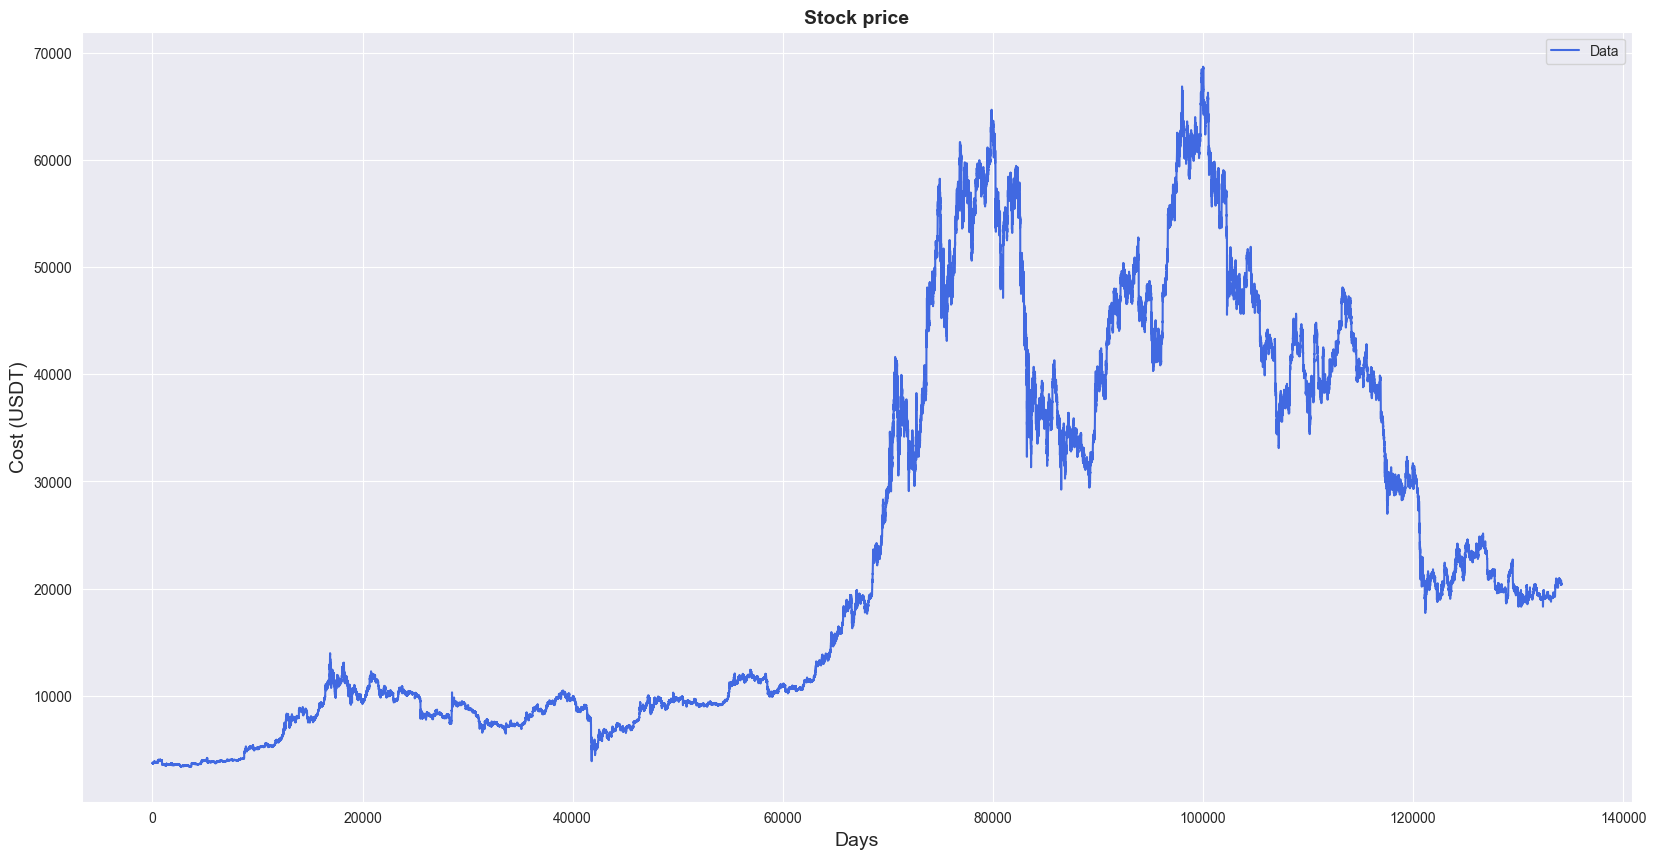

In [14]:
dataframe = dataframe[dataframe[IGNORE_INDEX] == 0]
plot_graph(pd.DataFrame(dataframe[CLOSE_INDEX].values))

In [17]:
df1 = dataframe[columns]
df1['Time'] = np.arange(len(dataframe.index))

/var/folders/h3/9j390gx10pb67vhwk1f_m4sm0000gn/T/ipykernel_15511/842615859.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Time'] = np.arange(len(dataframe.index))


In [20]:
X = df1.loc[:, ['Time']]
y = df1.loc[:, CLOSE_INDEX]

In [22]:
linear_model = LinearRegression()
linear_model.fit(X, y)

y_pred = pd.Series(linear_model.predict(X), index=X.index)

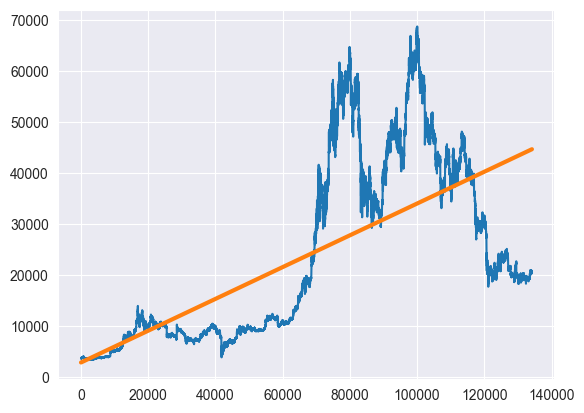

In [26]:
ax = y.plot()
ax = y_pred.plot(ax=ax, linewidth=3)